In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 131 files belonging to 12 classes.


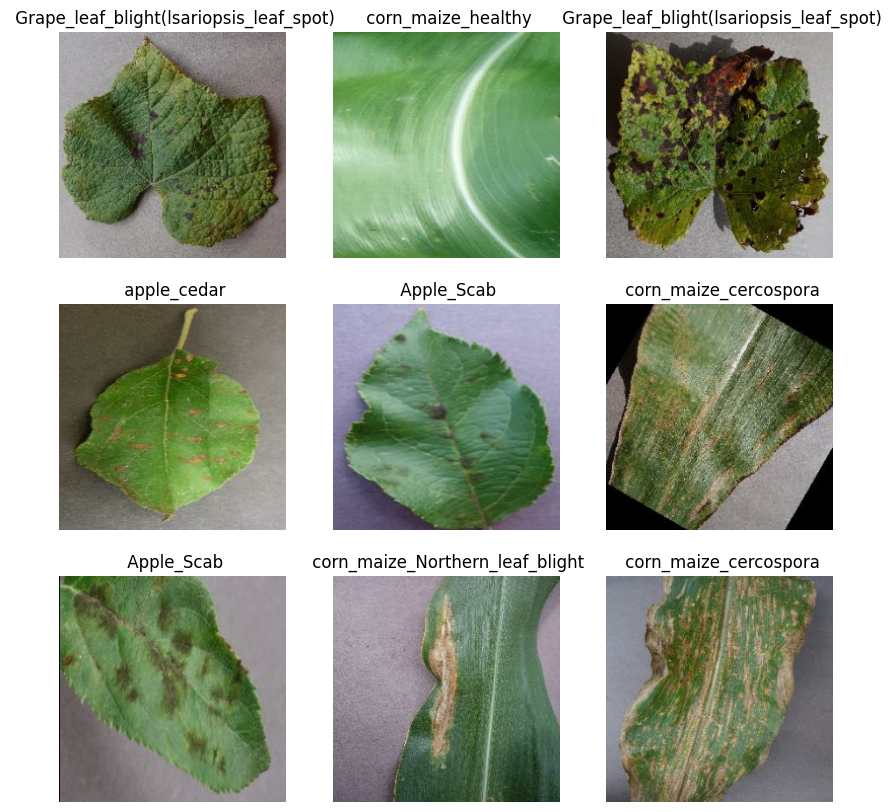

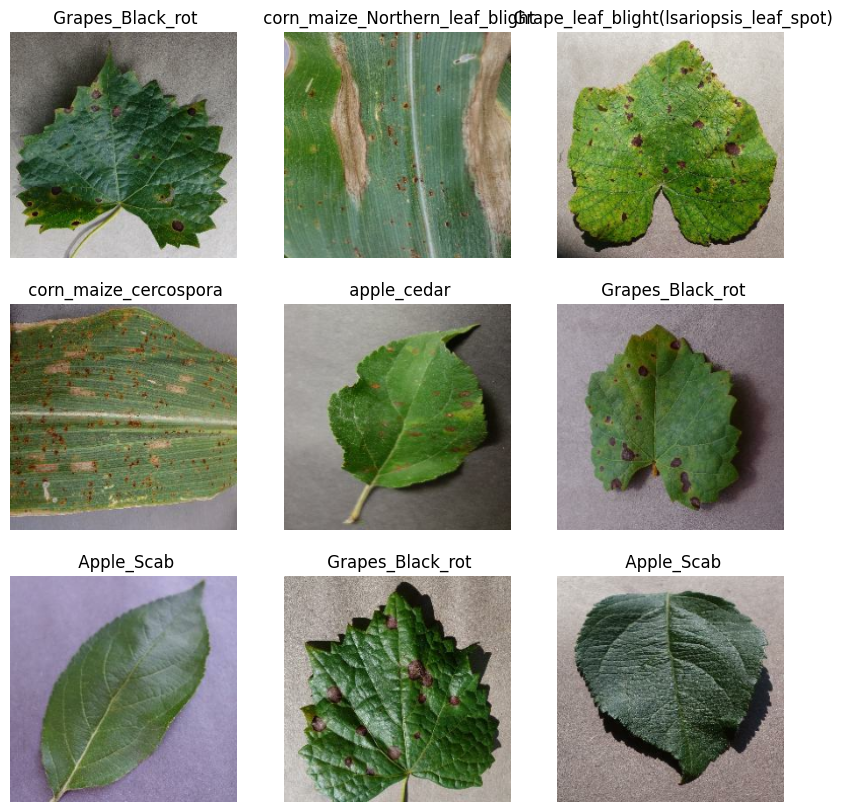

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Directory containing the image folders (each folder is a class)
image_dir = '/content/drive/MyDrive/Idp/Plant_diseases'  # Change this to the path containing multiple folders

# Load images from the directory, each subfolder will be treated as a class
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,          # Specify batch size
    labels='inferred',      # Infer labels from subfolder names
    label_mode='int',       # Use integer labels for classification
    shuffle=True            # Shuffle the data
)

# Get class names from the dataset
class_names = image_dataset.class_names

# Function to display images and labels (plant names)
def show_images(images, labels):
    plt.figure(figsize=(10, 10))  # Create a figure of size 10x10
    for i in range(9):  # Show 10 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to numpy array for display
        plt.title(f" {class_names[labels[i].numpy()]}")  # Display the plant name as the title
        plt.axis("off")  # Turn off axis

# Iterate through the dataset and show images
for images, labels in image_dataset.take(1):  # Take 1 batch of images (32 in this case)
    show_images(images, labels)
for Apple_scab, labels in image_dataset.take(1):  # Take 1 batch of images (32 in this case)
    show_images(Apple_scab, labels)


Found 131 files belonging to 12 classes.
Using 105 files for training.
Found 131 files belonging to 12 classes.
Using 52 files for validation.
Number of classes: 12
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.0513 - loss: 2.9326 - val_accuracy: 0.3077 - val_loss: 2.1562
Epoch 2/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.4453 - loss: 1.7405 - val_accuracy: 0.6346 - val_loss: 1.3803
Epoch 3/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.8030 - loss: 1.0344 - val_accuracy: 0.6346 - val_loss: 1.1070
Epoch 4/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.8002 - loss: 0.7736 - val_accuracy: 0.6923 - val_loss: 0.9699
Epoch 5/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.9182 - loss: 0.4233 - val_accuracy: 0.7500 - val_loss: 0.7731
Epoch 6/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.9234 - loss: 0.3558 - val_accuracy: 0.7500 - val_loss: 0.6516
Epoch 7/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 

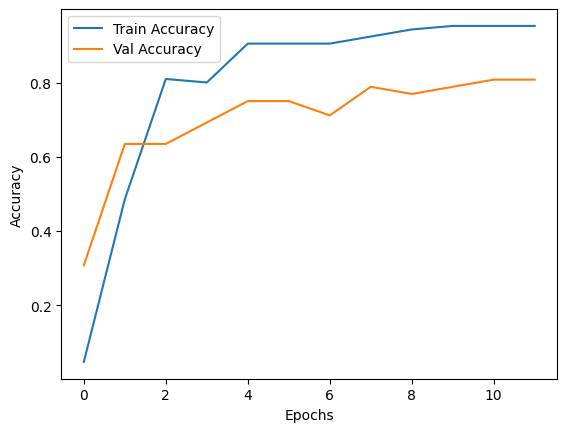

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Directory containing the image folders (each folder is a class)
image_dir = '/content/drive/MyDrive/Idp/Plant_diseases'  # Update with the correct path

# Load training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),
    batch_size=32,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=42
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),
    batch_size=32,
    labels='inferred',
    label_mode='int',
    validation_split=0.4,
    subset='validation',
    shuffle=True,
    seed=42
)

# Determine the number of classes dynamically
num_classes = len(train_dataset.class_names)
print(f'Number of classes: {num_classes}')

# Normalize the pixel values
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Load the InceptionV3 model with pre-trained ImageNet weights
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Define the model architecture
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Use global average pooling
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=12
)

# Evaluate the model
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation accuracy using InceptionV3: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


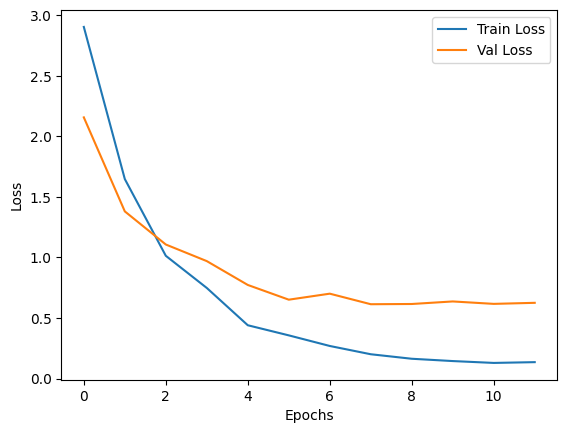

In [ ]:
# prompt: can you give me loss code also

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 131 files belonging to 12 classes.
Using 105 files for training.
Found 131 files belonging to 12 classes.
Using 52 files for validation.
Number of classes: 12
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 102s 27s/step - accuracy: 0.1498 - loss: 3.7932 - val_accuracy: 0.1538 - val_loss: 2.5155
Epoch 2/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 87s 23s/step - accuracy: 0.3322 - loss: 1.7856 - val_accuracy: 0.6923 - val_loss: 1.2110
Epoch 3/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 85s 22s/step - accuracy: 0.7260 - loss: 0.9275 - val_accuracy: 0.7885 - val_loss: 0.9053
Epoch 4/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 92s 23s/step - accuracy: 0.9063 - loss: 0.4469 - val_accuracy: 0.6923 - val_loss: 0.9481
Epoch 5/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 149s 27s/step - accuracy: 0.9396 - loss: 0.2905 - val_accuracy: 0.7308 - val_loss: 0.7946
Epoch 6/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 98s 27s/step - accuracy: 0.9632 - loss: 0.1748 - val_accuracy: 0.7500 - val_loss: 0.7254
Epoch 7/12
4/4 ━━━━━━━━━━━━━━━━━

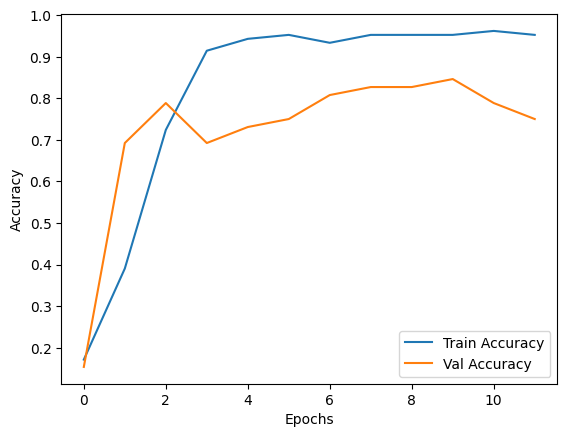

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Directory containing the image folders (each folder is a class)
image_dir = '/content/drive/MyDrive/Idp/Plant_diseases'  # Update with the correct path

# Load training and validation datasets separately
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,          # Specify batch size
    labels='inferred',      # Infer labels from subfolder names
    label_mode='int',       # Use integer labels for classification
    validation_split=0.2,   # 20% data for validation
    subset='training',      # Load training set
    shuffle=True,           # Shuffle the data
    seed=42                 # Set seed for reproducibility
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,          # Specify batch size
    labels='inferred',      # Infer labels from subfolder names
    label_mode='int',       # Use integer labels for classification
    validation_split=0.4,   # 20% data for validation
    subset='validation',    # Load validation set
    shuffle=True,           # Shuffle the data
    seed=42                 # Set seed for reproducibility
)

# Determine the number of classes dynamically before applying map
num_classes = len(train_dataset.class_names)
print(f'Number of classes: {num_classes}')  # Print the number of classes

# Normalize the pixel values to [0, 1] range
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Load the VGG16 model with pre-trained ImageNet weights, excluding the top classification layer
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model (prevent the weights from being updated during training)
base_model.trainable = False

# Define the new model architecture
model = models.Sequential([
    base_model,  # Pre-trained VGG16 base
    layers.Flatten(),  # Flatten the output from the base model
    layers.Dense(128, activation='relu'),  # Add a fully connected layer
    layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=12  # Set the number of epochs
)

# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation accuracy using VGG16: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


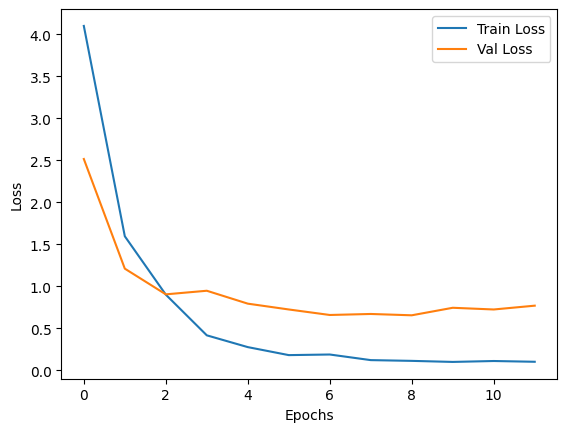

In [ ]:
# prompt: give loss graph

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 131 files belonging to 12 classes.
Using 105 files for training.
Found 131 files belonging to 12 classes.
Using 52 files for validation.
Number of classes: 12
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 9s/step - accuracy: 0.0940 - loss: 2.9729 - val_accuracy: 0.2885 - val_loss: 2.1340
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.3177 - loss: 2.1177 - val_accuracy: 0.6923 - val_loss: 1.4679
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.5976 - loss: 1.3865 - val_accuracy: 0.6923 - val_loss: 1.1102
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.6878 - loss: 1.0145 - val_accuracy: 0.7115 - val_loss: 0.9135
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.7437 - loss: 0.8083 - val_accuracy: 0.8269 - val_loss: 0.7196
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.8408 - loss: 0.5845 - val_accuracy: 0.8077 - val_loss: 0.6355
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 

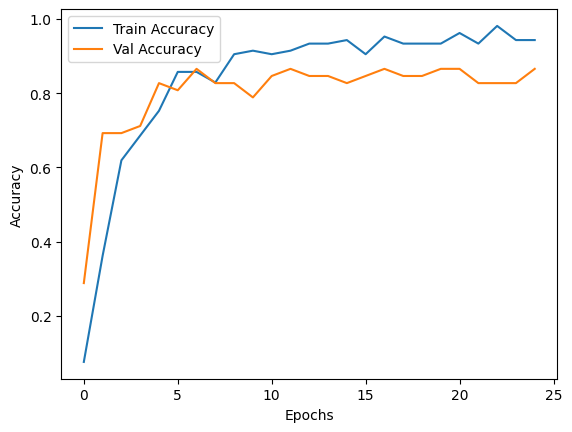

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Directory containing the image folders (each folder is a class)
image_dir = '/content/drive/MyDrive/Idp/Plant_diseases'  # Update with the correct path

# Load training and validation datasets separately
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,          # Specify batch size
    labels='inferred',      # Infer labels from subfolder names
    label_mode='int',       # Use integer labels for classification
    validation_split=0.2,   # 20% data for validation
    subset='training',      # Load training set
    shuffle=True,           # Shuffle the data
    seed=42                 # Set seed for reproducibility
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,          # Specify batch size
    labels='inferred',      # Infer labels from subfolder names
    label_mode='int',       # Use integer labels for classification
    validation_split=0.4,   # 20% data for validation
    subset='validation',    # Load validation set
    shuffle=True,           # Shuffle the data
    seed=42                 # Set seed for reproducibility
)

# Determine the number of classes dynamically
num_classes = len(train_dataset.class_names)
print(f'Number of classes: {num_classes}')  # Print the number of classes

# Normalize the pixel values to [0, 1] range
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Load the DenseNet121 model with pre-trained ImageNet weights, excluding the top classification layer
base_model = DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model (prevent the weights from being updated during training)
base_model.trainable = False

# Define the new model architecture
model = models.Sequential([
    base_model,  # Pre-trained DenseNet121 base
    layers.GlobalAveragePooling2D(),  # Global average pooling
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.3),  # Dropout for regularization
    layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=25  # Set the number of epochs
)

# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation accuracy using DenseNet121: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


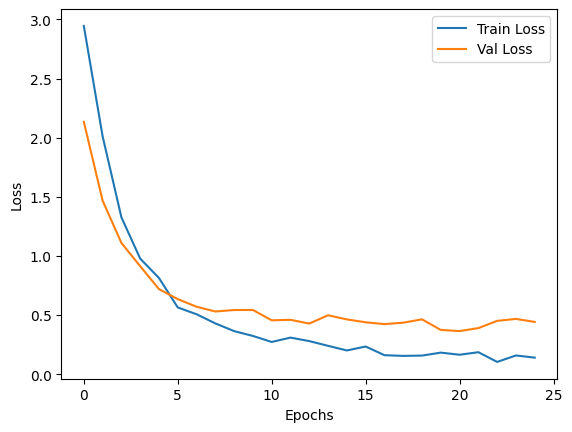

In [ ]:
# prompt: can you give me loss graph

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 131 files belonging to 12 classes.
Using 105 files for training.
Found 131 files belonging to 12 classes.
Using 52 files for validation.
Number of classes: 12
Epoch 1/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.0711 - loss: 2.7318 - val_accuracy: 0.4231 - val_loss: 1.6792
Epoch 2/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5387 - loss: 1.4941 - val_accuracy: 0.6923 - val_loss: 1.0024
Epoch 3/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7662 - loss: 0.8310 - val_accuracy: 0.7115 - val_loss: 0.7463
Epoch 4/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9095 - loss: 0.4684 - val_accuracy: 0.7115 - val_loss: 0.5656
Epoch 5/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9303 - loss: 0.2679 - val_accuracy: 0.7692 - val_loss: 0.5124
Epoch 6/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9542 - loss: 0.1826 - val_accuracy: 0.8077 - val_loss: 0.5015
Epoch 7/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9490 - loss: 0.1423 - val_accura

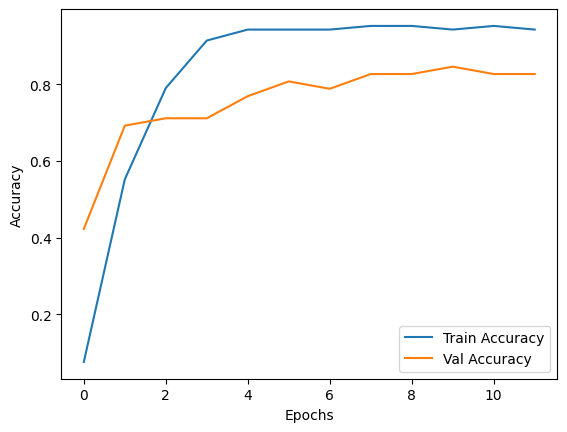

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Directory containing the image folders (each folder is a class)
image_dir = '/content/drive/MyDrive/Idp/Plant_diseases'  # Update with the correct path

# Load training and validation datasets separately
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,          # Specify batch size
    labels='inferred',      # Infer labels from subfolder names
    label_mode='int',       # Use integer labels for classification
    validation_split=0.2,   # 20% data for validation
    subset='training',      # Load training set
    shuffle=True,           # Shuffle the data
    seed=42                 # Set seed for reproducibility
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,          # Specify batch size
    labels='inferred',      # Infer labels from subfolder names
    label_mode='int',       # Use integer labels for classification
    validation_split=0.4,   # 20% data for validation
    subset='validation',    # Load validation set
    shuffle=True,           # Shuffle the data
    seed=42                 # Set seed for reproducibility
)

# Determine the number of classes dynamically before applying map
num_classes = len(train_dataset.class_names)
print(f'Number of classes: {num_classes}')  # Print the number of classes

# Normalize the pixel values to [0, 1] range
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Load the MobileNetV2 model with pre-trained ImageNet weights, excluding the top classification layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model (prevent the weights from being updated during training)
base_model.trainable = False

# Define the new model architecture
model = models.Sequential([
    base_model,  # Pre-trained MobileNetV2 base
    layers.GlobalAveragePooling2D(),  # Global average pooling
    layers.Dense(128, activation='relu'),  # Add a fully connected layer
    layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=12  # Set the number of epochs
)

# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation accuracy using MobileNetV2: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


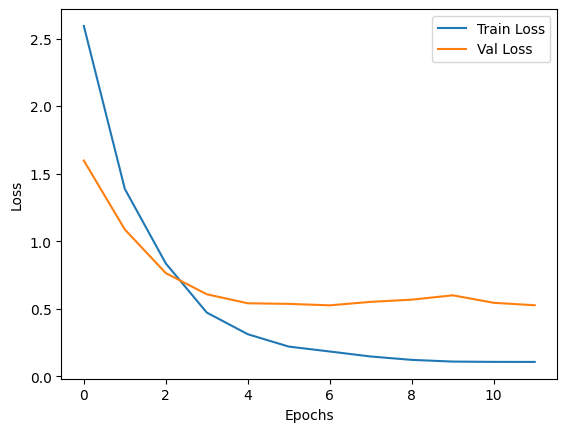

In [ ]:
# prompt: loss graph provide

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 131 files belonging to 12 classes.
Using 105 files for training.
Found 131 files belonging to 12 classes.
Using 26 files for validation.
Number of classes: 12
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 9s/step - accuracy: 0.0725 - loss: 3.2073 - val_accuracy: 0.0385 - val_loss: 2.6784 - learning_rate: 1.0000e-04
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 6s/step - accuracy: 0.1561 - loss: 2.4059 - val_accuracy: 0.1538 - val_loss: 2.3583 - learning_rate: 1.0000e-04
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.2182 - loss: 2.2392 - val_accuracy: 0.2308 - val_loss: 2.1270 - learning_rate: 1.0000e-04
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step - accuracy: 0.2571 - loss: 2.0551 - val_accuracy: 0.3077 - val_loss: 1.9300 - learning_rate: 1.0000e-04
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.4415 - loss: 1.8174 - val_accuracy: 0.3846 - val_loss: 1.7096 - learning_rate: 1.0000e-04
Epoch 6/30
4/4 ━━━━━━━━━

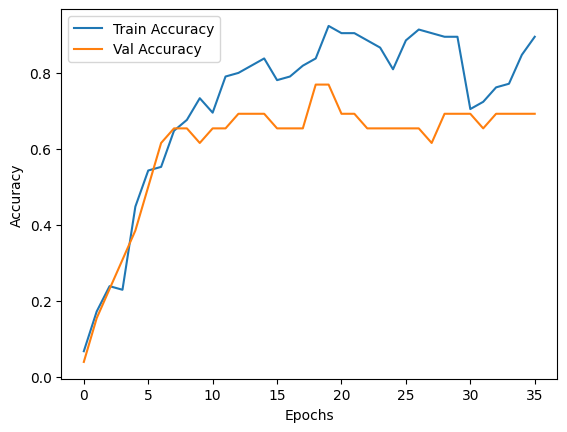

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Directory containing the image folders (each folder is a class)
image_dir = '/content/drive/MyDrive/Idp/Plant_diseases'  # Update the correct path

# Load training and validation datasets separately
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,          # Batch size
    labels='inferred',      # Infer labels from folder names
    label_mode='int',       # Integer labels
    validation_split=0.2,   # 20% for validation
    subset='training',
    shuffle=True,
    seed=42
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),
    batch_size=32,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    seed=42
)

# Determine the number of classes
num_classes = len(train_dataset.class_names)
print(f'Number of classes: {num_classes}')

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Preprocessing (ResNet expects specific normalization)
def preprocess(image, label):
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label

train_dataset = train_dataset.map(preprocess).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.map(preprocess).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Load Pretrained ResNet50 Model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Custom Model on top of ResNet50
model = models.Sequential([
    data_augmentation,  # Augmentations applied here
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,  # Train for 30 epochs (increase if needed)
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
)

# Unfreeze Some Layers & Fine-Tune
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Unfreeze last 50 layers
    layer.trainable = False

# Recompile Model with Lower Learning Rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning Training
history_fine = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  # More epochs to fine-tune
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

# Evaluate the Model
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation accuracy using ResNet50: {accuracy * 100:.2f}%")

# Plot Training History
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


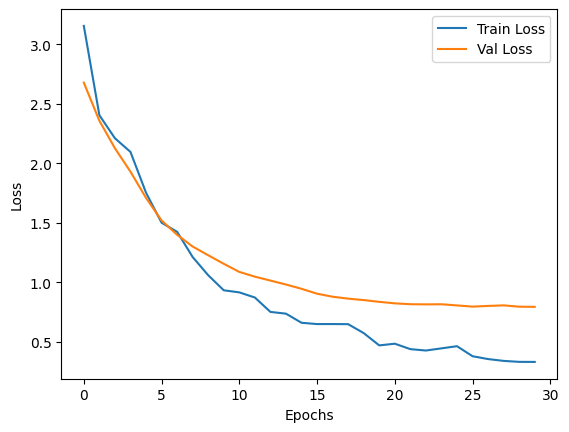

In [ ]:
# prompt: can you provide loss code

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<ipython-input-15-fde0b9d22a53>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


Found 131 images belonging to 12 classes.
Found 131 images belonging to 12 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
4/5 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step 

5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step
Stacking Classifier Accuracy: 84.73%


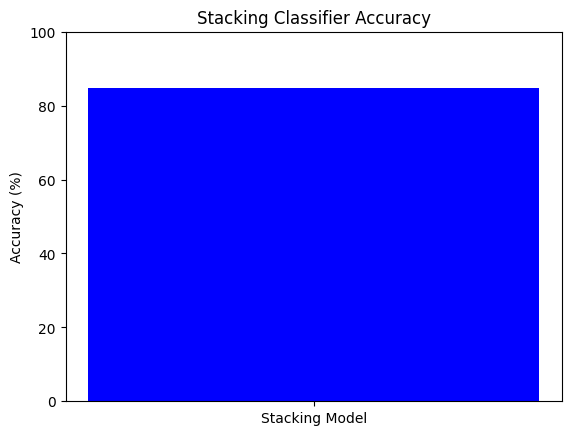

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Load Pretrained Models (Feature Extractors)
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Data Preparation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Update with the correct paths to your training and validation data
train_data_dir = '/content/drive/MyDrive/Idp/Plant_diseases'
val_data_dir = '/content/drive/MyDrive/Idp/Plant_diseases'

train_dataset = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

val_dataset = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Feature Extraction Function
def extract_features(dataset, base_model):
    features = base_model.predict(dataset, verbose=1)  # Directly predict on the dataset
    labels = dataset.classes  # Get class labels
    return features, labels

# Extract Features
X_train_mobilenet, y_train = extract_features(train_dataset, base_model_mobilenet)
X_train_densenet, _ = extract_features(train_dataset, base_model_densenet)
X_val_mobilenet, y_val = extract_features(val_dataset, base_model_mobilenet)
X_val_densenet, _ = extract_features(val_dataset, base_model_densenet)

# Concatenate Features for Stacking
X_train = np.hstack([X_train_mobilenet, X_train_densenet])
X_val = np.hstack([X_val_mobilenet, X_val_densenet])

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('mobilenet', LogisticRegression(max_iter=1000)),
        ('densenet', LogisticRegression(max_iter=1000))
    ],
    final_estimator=LogisticRegression(max_iter=1000)
)

# Train and Evaluate Model
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
accuracy = np.mean(y_pred == y_val)

print(f"Stacking Classifier Accuracy: {accuracy * 100:.2f}%")

# Plot Accuracy
plt.bar(['Stacking Model'], [accuracy * 100], color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Stacking Classifier Accuracy')
plt.ylim(0, 100)
plt.show()


Found 131 files belonging to 12 classes.
Using 105 files for training.
Found 131 files belonging to 12 classes.
Using 26 files for validation.

Number of classes: 12

Epoch 1/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.0624 - loss: 2.7284 - val_accuracy: 0.3462 - val_loss: 2.2279
Epoch 2/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.4477 - loss: 1.7658 - val_accuracy: 0.6154 - val_loss: 1.5214
Epoch 3/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.8221 - loss: 0.9395 - val_accuracy: 0.5385 - val_loss: 1.2702
Epoch 4/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.8096 - loss: 0.6750 - val_accuracy: 0.5000 - val_loss: 1.1748
Epoch 5/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9126 - loss: 0.3839 - val_accuracy: 0.6154 - val_loss: 0.9580
Epoch 6/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.9386 - loss: 0.2958 - val_accuracy: 0.7308 - val_loss: 0.9280
Epoch 7/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.9060 - loss: 0.2359 - val_a

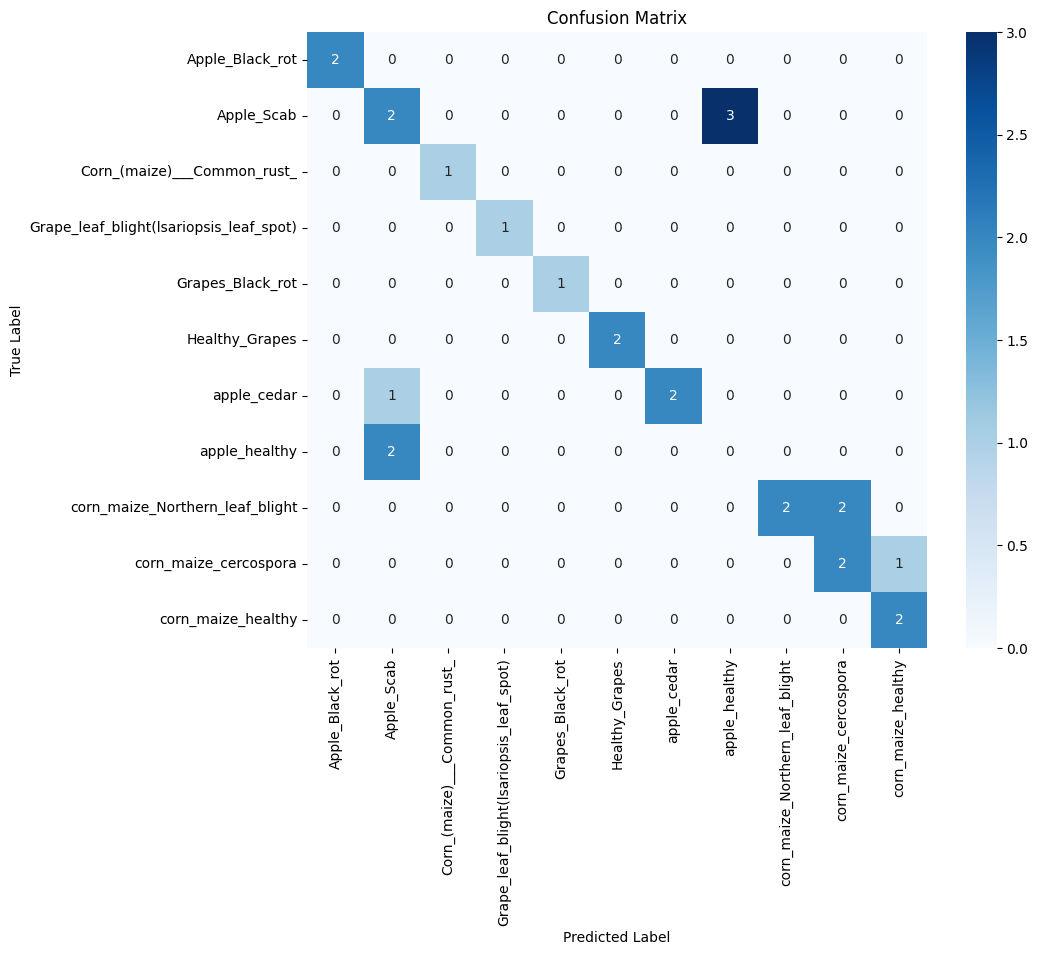

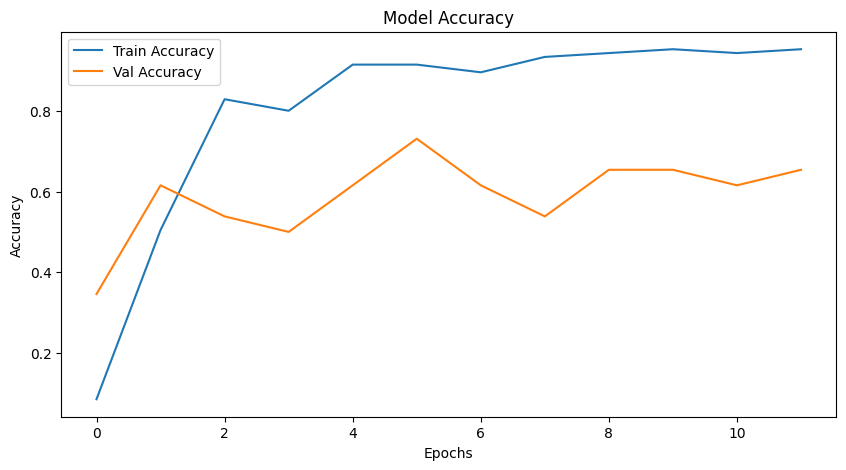

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

#  Dataset Path
image_dir = '/content/drive/MyDrive/Idp/Plant_diseases'

#  Load datasets with correct splits
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=42
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    seed=42
)

#  Get class names and print details
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f'\nNumber of classes: {num_classes}\n')

#  Normalize images
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

#  Load Pre-trained InceptionV3 model
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

#  Define Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

#  Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#  Train Model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=12
)

#  Evaluate Model
loss, accuracy = model.evaluate(val_dataset)
print(f"\nValidation Accuracy using InceptionV3: {accuracy * 100:.2f}%\n")

#  Get Predictions
y_true, y_pred = [], []

for images, labels in val_dataset:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

y_true, y_pred = np.array(y_true), np.array(y_pred)

#  Fix Classification Report Error
unique_classes = np.unique(y_true)
filtered_class_names = [class_names[i] for i in unique_classes]

#  Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

#  Print Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=filtered_class_names, digits=4))

#  Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=filtered_class_names, yticklabels=filtered_class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

#  Plot Accuracy Graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


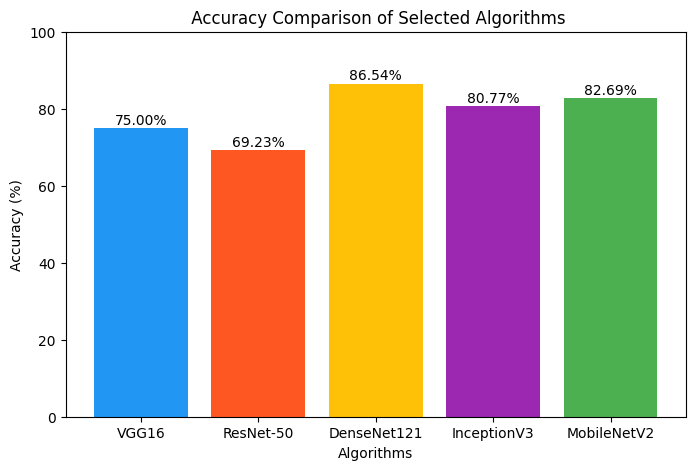

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names and their corresponding new accuracies
algorithms = ['VGG16', 'ResNet-50', 'DenseNet121', 'InceptionV3', 'MobileNetV2']
accuracies = [75.00, 69.23, 86.54, 80.77, 82.69]  # Updated accuracy values

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracies, color=['#2196F3', '#FF5722', '#FFC107', '#9C27B0', '#4CAF50'])

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title(' Accuracy Comparison of Selected Algorithms')
plt.ylim(0, 100)

# Display values on top of bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 1, f'{accuracy:.2f}%', ha='center')

# Show the plot
plt.show()


Found 131 files belonging to 12 classes.
Using 105 files for training.
Found 131 files belonging to 12 classes.
Using 52 files for validation.
Number of classes: 12
Epoch 1/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step - accuracy: 0.1183 - loss: 2.7737 - val_accuracy: 0.3269 - val_loss: 1.9480
Epoch 2/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.4218 - loss: 1.5896 - val_accuracy: 0.6731 - val_loss: 1.1620
Epoch 3/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - accuracy: 0.7603 - loss: 0.9086 - val_accuracy: 0.7308 - val_loss: 0.8996
Epoch 4/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.8623 - loss: 0.5870 - val_accuracy: 0.7115 - val_loss: 0.7833
Epoch 5/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.9122 - loss: 0.3920 - val_accuracy: 0.7692 - val_loss: 0.6278
Epoch 6/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.9542 - loss: 0.2655 - val_accuracy: 0.9038 - val_loss: 0.5288
Epoch 7/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.9511 - loss: 0.2027 - val_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Confusion Matrix:
 [[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 3 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0]
 [0 1 0 0 0 0 0 5 0 0 0 0]
 [0 2 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 1 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 5]]
Classification Report:
                                          precision    recall  f1-score   support

                        Apple_Black_rot       1.00      1.00      1.00         2
                             Apple_Scab       0.40      0.40      0.40         5
            Corn_(maize)___Common_rust_       1.00      0.50      0.67         2
             Grape_Esca_(Black_measles)       1.00      1.00      1.00         3
Grape_leaf_blight(lsariopsis_leaf_spot)       1.00      1.00      1.00         6
                       Grapes_Black_rot       1.00      1.00      1.00         3
                         Hea

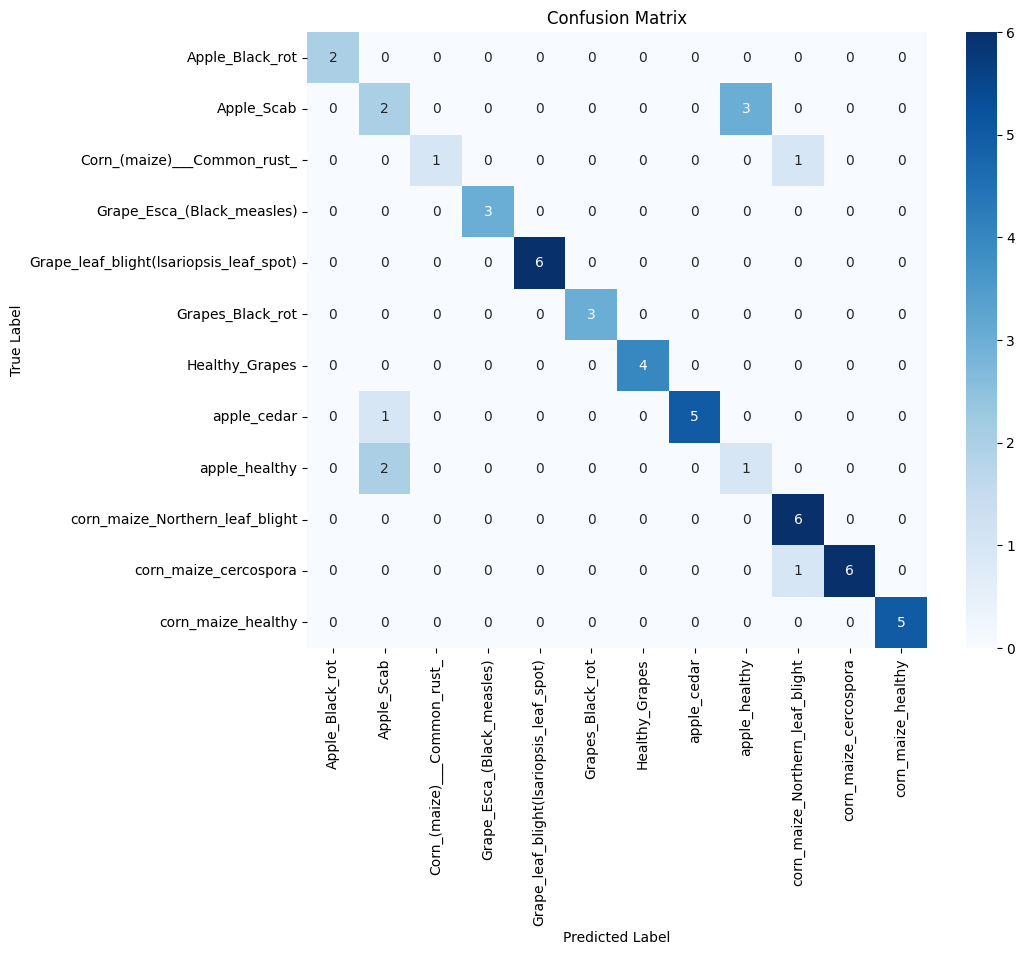

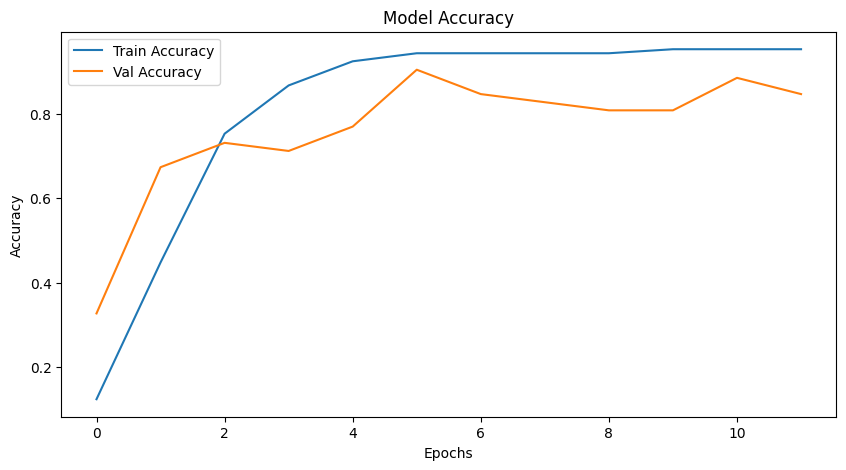

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


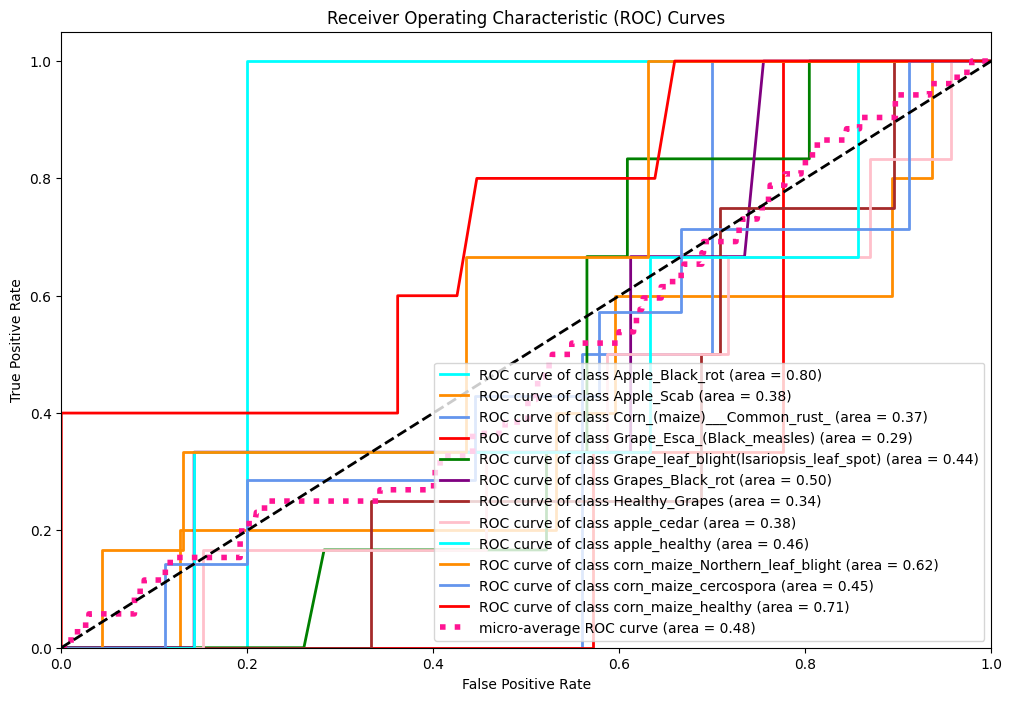

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np
from itertools import cycle

# Directory containing the image folders (each folder is a class)
image_dir = '/content/drive/MyDrive/Idp/Plant_diseases'  # Update with the correct path

# Load training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),
    batch_size=32,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=42
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    image_size=(224, 224),
    batch_size=32,
    labels='inferred',
    label_mode='int',
    validation_split=0.4,
    subset='validation',
    shuffle=True,
    seed=42
)

class_names = train_dataset.class_names
num_classes = len(class_names)
print(f'Number of classes: {num_classes}')

# Normalize the pixel values
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Load the InceptionV3 model with pre-trained ImageNet weights
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Define the model architecture
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=12
)

# Evaluate the model
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation accuracy using InceptionV3: {accuracy * 100:.2f}%")

# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Convert to numpy arrays for metrics calculation
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Binarize the output for ROC and AUC
y_true_bin = label_binarize(y_true, classes=range(num_classes))
y_pred_prob = model.predict(val_dataset)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Load the pre-trained InceptionV3 model (without the top layer)
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model (no need for further training)
base_model.trainable = False

# Define the model architecture
# Assuming there are 4 classes: Healthy, Common Rust, Powdery Mildew, Leaf Blight
num_classes = 4  # Change this to match your dataset
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Adjusted for the number of disease classes
])

# Load model weights (if you have trained and saved your model weights)
# model.load_weights('path_to_your_trained_model_weights.h5')

# Preprocessing function for new input images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    return img_array

# Prediction function
def predict_image(img_path, model):
    # Check if img_path is a directory
    if os.path.isdir(img_path):
        # If it's a directory, get a list of image files within it
        image_files = [os.path.join(img_path, f) for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f))]

        # If there are images in the directory, use the first one
        if image_files:
            img_path = image_files[0]
        else:
            raise ValueError("No image files found in the directory.")
# Directly assign the image path
img_path = "/content/drive/MyDrive/Idp/Plant_diseases/Apple_Scab"  # Directly assign the image path

# Predict the class of the input image
predicted_class, confidence = predict_image(img_path, model)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence * 100:.2f}%")

# Optional: Display the input image
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis("off")
plt.show()


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Load the pre-trained InceptionV3 model (without the top layer)
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model (no need for further training)
base_model.trainable = False

# Define the number of classes in your dataset
num_classes = 4  # Update this to match your dataset

# Define the model architecture
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Adjusted for the number of disease classes
])

# Load model weights (if applicable)
# model.load_weights('path_to_your_trained_model_weights.h5')

# Define class labels (Update this with your actual class names)
class_labels = ['Healthy', 'Common Rust', 'Powdery Mildew', 'Leaf Blight']  # Modify accordingly

# Preprocessing function for input images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    return img_array

# Prediction function
def predict_image(img_path, model):
    # Check if img_path is a directory
    if os.path.isdir(img_path):
        image_files = [os.path.join(img_path, f) for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f))]
        if image_files:
            img_path = image_files[0]  # Use the first image in the directory
        else:
            raise ValueError("No image files found in the directory.")

    # Process the image
    img_array = preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)  # Get index of highest probability class
    confidence = np.max(predictions)  # Get confidence score

    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]

    return predicted_class, confidence

# Define image path (Modify as per your dataset structure)
img_path = "/content/drive/MyDrive/Idp/Plant_diseases/Healthy_Grapes/Grape_Healthy9.JPG"

# Get a list of image files in the directory
image_files = [f for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f))]

# Check if any image files were found
if image_files:
    # Use the path to the first image file
    img_path = os.path.join(img_path, image_files[0])
else:
    raise ValueError("No image files found in the specified directory.")

# Predict the class of the input image
predicted_class, confidence = predict_image(img_path, model)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence * 100:.2f}%")

# Display the input image with the prediction
img = image.load_img(img_path, target_size=(224, 224))  # Load the actual image file
plt.imshow(img)
plt.title(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)")
plt.axis("off")
plt.show()

NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/Idp/Plant_diseases/Healthy_Grapes/Grape_Healthy9.JPG'

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class: Healthy, Confidence: 50.56%


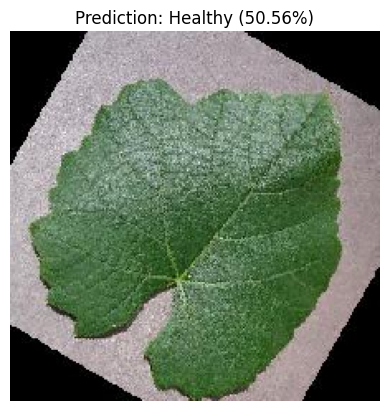

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model (no need for further training)
base_model.trainable = False

# Define the number of classes in your dataset
num_classes = 4  # Update this to match your dataset

# Define the model architecture
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Adjusted for the number of disease classes
])

# Load model weights (if applicable)
# model.load_weights('path_to_your_trained_model_weights.h5')

# Define class labels (Update this with your actual class names)
class_labels = ['Healthy', 'Common Rust', 'Powdery Mildew', 'Leaf Blight']  # Modify accordingly

# Preprocessing function for input images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    return img_array

# Prediction function
def predict_image(img_path, model):
    # Check if img_path is a directory
    if os.path.isdir(img_path):
        image_files = [os.path.join(img_path, f) for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f))]
        if image_files:
            img_path = image_files[0]  # Use the first image in the directory
        else:
            raise ValueError("No image files found in the directory.")

    # Process the image
    img_array = preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)  # Get index of highest probability class
    confidence = np.max(predictions)  # Get confidence score

    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]

    return predicted_class, confidence
    # Define image path (Modify as per your dataset structure)
img_path = "/content/drive/MyDrive/Idp/Plant_diseases/Healthy_Grapes/Grape_Healthy10.JPG"

# Predict the class of the input image directly (no need to check for directory)
predicted_class, confidence = predict_image(img_path, model)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence * 100:.2f}%")

# Display the input image with the prediction
img = image.load_img(img_path, target_size=(224, 224))  # Load the actual image file
plt.imshow(img)
plt.title(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)")
plt.axis("off")
plt.show()